# Objective of the analysis

Some of the most important tasks that we can analyze from Netflix data are:

understand what content is available

understand the similarities between the content

understand the network between actors and directors

what exactly Netflix is focusing on

and sentiment analysis of content available on Netflix.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("netflix_titles.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [3]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [4]:
#checking out the  number of rows and the columns
df.shape

(7787, 12)

so  7787 rows and 12 columns in our dataset

In [5]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [6]:
#checking out the data types
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [7]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

So it seem lots of director for the films are missing alot
 
so it the cast and the country  and few ratings

# Distribution of Content:

In [8]:
dist=df.groupby(['rating']).size().reset_index(name='counts')
dist

,rating,counts
0,G,39
1,NC-17,3
2,NR,84
3,PG,247
4,PG-13,386
5,R,665
6,TV-14,1931
7,TV-G,194
8,TV-MA,2863
9,TV-PG,806


Text(0.5, 1.0, 'The distributions of the  the ratings of the netflix movies')

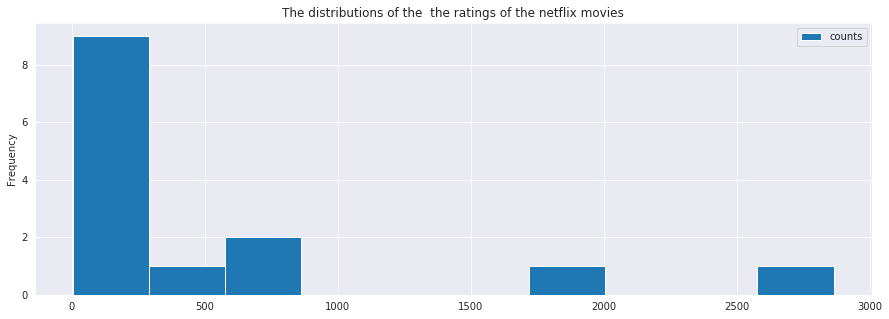

In [54]:

dist.plot(kind='hist',figsize=(15,5))
plt.title('The distributions of the  the ratings of the netflix movies')


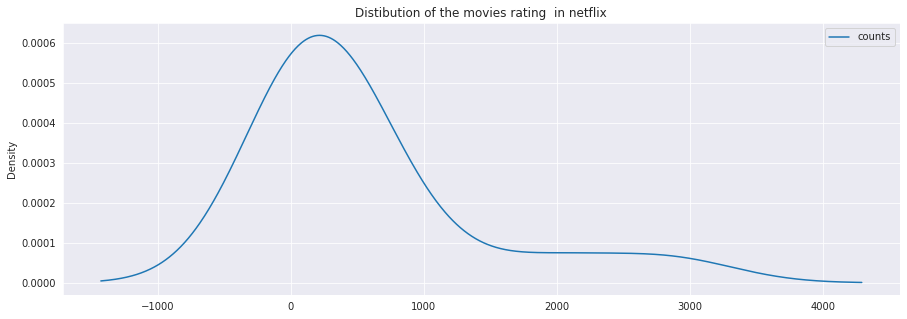

In [57]:
dist.plot(kind='kde',figsize=(15,5))
plt.title('Distibution of the movies rating  in netflix')
plt.show()

The data is left skewwed

and it has some properties of the  gaussian distributions 

With this it suggest their is a possiblities of  outliers that is some movies have a very high rating compared to

others



In [11]:
label=dist['rating']



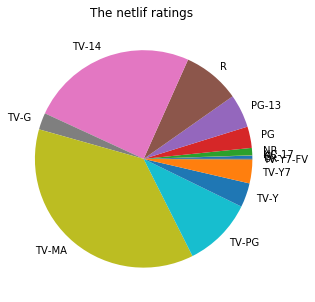

In [12]:
plt.figure(figsize=(50,5))
plt.pie(dist['counts'],labels=label)
plt.title("The netlif ratings ")
plt.show()

 majority of content on Netflix is categorized as “TV-MA”, which means that most of the content available on
 
 Netflix is intended for viewing by mature and adult audiences.

# Top 5 Directors

In [13]:
#filling the null values 
df['director']=df['director'].fillna("No specified director")

df['director']

0       No specified director
1           Jorge Michel Grau
2                Gilbert Chan
3                 Shane Acker
4              Robert Luketic
                ...          
7782              Josef Fares
7783              Mozez Singh
7784    No specified director
7785    No specified director
7786                 Sam Dunn
Name: director, Length: 7787, dtype: object

In [14]:
#converting it in into data frame
filter_directors=pd.DataFrame()
filter_directors=df['director'].str.split(',',expand=True).stack()
filter_directors=filter_directors.to_frame()
filter_directors.columns=['director']


In [15]:
director=filter_directors.groupby(['director']).size().reset_index(name='Total_content')
director

,director,Total_content
0,Aaron Moorhead,1
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
4578,Çagan Irmak,1
4579,Ísold Uggadóttir,1
4580,Óskar Thór Axelsson,1
4581,Ömer Faruk Sorak,2


In [16]:
#to exclude the No specified director
director=director[director.director!='No specified director']
director

,director,Total_content
0,Aaron Moorhead,1
1,Aaron Woolf,1
2,Abbas Alibhai Burmawalla,1
3,Abdullah Al Noor,1
4,Abhinav Shiv Tiwari,1
...,...,...
4578,Çagan Irmak,1
4579,Ísold Uggadóttir,1
4580,Óskar Thór Axelsson,1
4581,Ömer Faruk Sorak,2


In [17]:
director=director.sort_values(by=['Total_content'],ascending=False)
director

,director,Total_content
3640,Raúl Campos,18
236,Jan Suter,18
2894,Marcus Raboy,16
2201,Jay Karas,15
1249,Cathy Garcia-Molina,13
...,...,...
1642,Eduardo Casanova,1
1644,Eduardo Mendoza de Echave,1
1645,Eduardo Pinto,1
1648,Edward Ellis,1


In [18]:
#top five directors
top_five=director.head()
top_five

,director,Total_content
3640,Raúl Campos,18
236,Jan Suter,18
2894,Marcus Raboy,16
2201,Jay Karas,15
1249,Cathy Garcia-Molina,13


In [19]:
top_five=top_five.sort_values(by=['Total_content'])
top_five

,director,Total_content
1249,Cathy Garcia-Molina,13
2201,Jay Karas,15
2894,Marcus Raboy,16
3640,Raúl Campos,18
236,Jan Suter,18


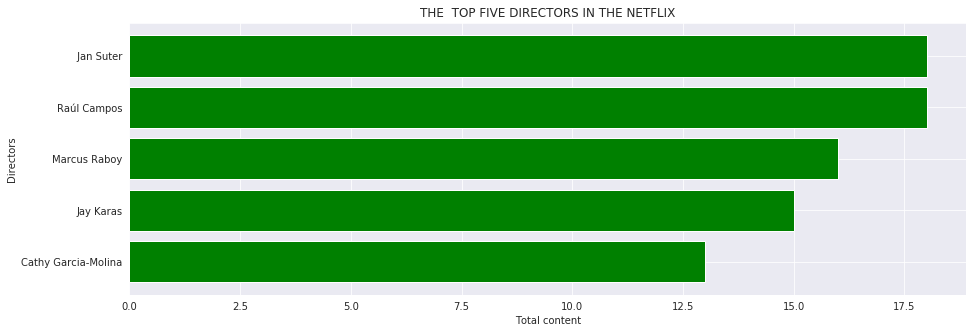

In [53]:
x=top_five['director']
y=top_five['Total_content']
plt.figure(figsize=(15,5))
plt.barh(x,y,color='green')
plt.title("THE  TOP FIVE DIRECTORS IN THE NETFLIX")
plt.xlabel("Total content")
plt.ylabel("Directors")

plt.show()

# Top 5 Actors

In [21]:
df['cast']=df['cast'].fillna('Not specified')
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                        Not specified
Name: cast, Length: 7787, dtype: object

In [22]:
#transforming the columns in a dataframe
#creating a dataframe
filter_cast=pd.DataFrame()
#spliting 
filter_cast=df['cast'].str.split(',',expand=True).stack()
#appending the data
filter_cast=filter_cast.to_frame()
#setting the column name
filter_cast.columns=['Actor']
filter_cast

Actor
0    0             João Miguel
     1        Bianca Comparato
     2            Michel Gomes
     3         Rodolfo Valente
     4         Vaneza Oliveira
...                        ...
7783 7   Chittaranjan Tripathy
7784 0                 Nasty C
7785 0           Adriano Zumbo
     1             Rachel Khoo
7786 0           Not specified

[56673 rows x 1 columns]

In [23]:
#grouping the data according to the actors
Actors=filter_cast.groupby(['Actor']).size().reset_index(name='Total_content')
Actors

,Actor,Total_content
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,1
3,2 Chainz,1
4,50 Cent,4
...,...,...
35368,İbrahim Büyükak,1
35369,İbrahim Çelikkol,1
35370,Şahin Irmak,1
35371,Şükrü Özyıldız,1


In [24]:
#exclude some data
Actors=Actors[Actor.Actor!='Not specified']


NameError: name 'Actor' is not defined

In [25]:
#sorting the data
Actors=Actors.sort_values(by=['Total_content'],ascending=False)
Actors

,Actor,Total_content
33887,Not specified,718
2321,Anupam Kher,38
27238,Takahiro Sakurai,28
21196,Om Puri,27
34593,Shah Rukh Khan,27
...,...,...
13698,José Troncoso,1
13696,José Santillán Cabuto,1
13692,José Ramón Barreto,1
13691,José Ramón Argoitia,1


In [26]:
top_five_actors=Actors.head()
top_five_actors

,Actor,Total_content
33887,Not specified,718
2321,Anupam Kher,38
27238,Takahiro Sakurai,28
21196,Om Puri,27
34593,Shah Rukh Khan,27


In [27]:
#ploting them 
top_five_actors=top_five_actors.sort_values(by=['Total_content'])
top_five_actors

,Actor,Total_content
21196,Om Puri,27
34593,Shah Rukh Khan,27
27238,Takahiro Sakurai,28
2321,Anupam Kher,38
33887,Not specified,718


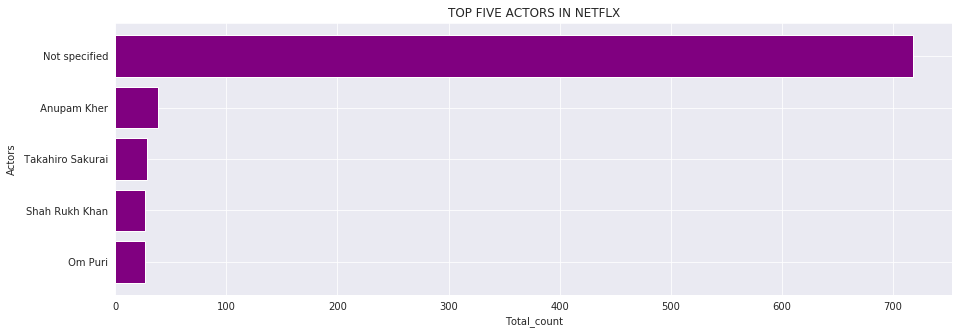

In [50]:
y=top_five_actors['Total_content']
x=top_five_actors['Actor']
plt.figure(figsize=(15,5))
plt.barh(x,y,color='purple')

plt.title('TOP FIVE ACTORS IN NETFLX')
plt.xlabel('Total_count')
plt.ylabel('Actors')
sns.set_style('darkgrid')
plt.show()

# Analyzing Content on Netflix

# The trend of production over the years on Netflix

In [29]:
data=df[['type','release_year']]

data

,type,release_year
0,TV Show,2020
1,Movie,2016
2,Movie,2011
3,Movie,2009
4,Movie,2008
...,...,...
7782,Movie,2005
7783,Movie,2015
7784,Movie,2019
7785,TV Show,2019


In [30]:
#reamaing the columns
data=data.rename(columns={'release_year':'Release Year'})
data.head(3)


,type,Release Year
0,TV Show,2020
1,Movie,2016
2,Movie,2011


In [31]:
# data1=data.groupby(['Release Year','type']).size().reset_index(name="Total content")
# data1.head()
data1=data.groupby(['Release Year','type']).size().reset_index(name='Total Content')
data1.head()

,Release Year,type,Total Content
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


In [32]:
#checking for realeae from 2010
data1=data1[data1['Release Year']>=2000]
data1.head()


,Release Year,type,Total Content
74,2000,Movie,30
75,2000,TV Show,4
76,2001,Movie,32
77,2001,TV Show,4
78,2002,Movie,39


In [33]:
data1.tail()

,Release Year,type,Total Content
113,2019,TV Show,414
114,2020,Movie,411
115,2020,TV Show,457
116,2021,Movie,12
117,2021,TV Show,19


In [34]:
data1.dtypes

Release Year      int64
type             object
Total Content     int64
dtype: object

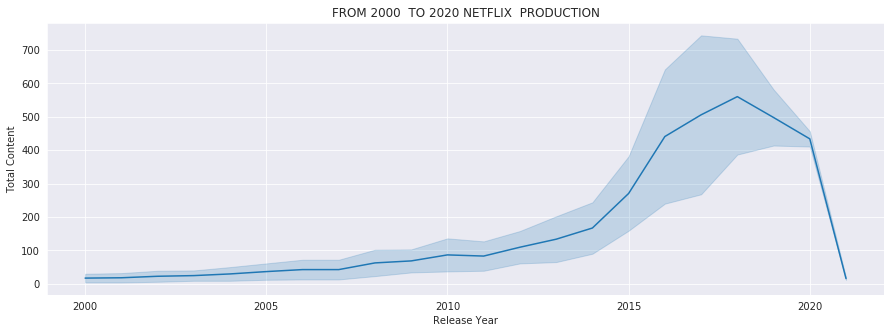

In [46]:
sns.set_style('darkgrid')
x=data1['Release Year']
y=data1['Total Content']
plt.figure(figsize=(15,5))
sns.lineplot(x,y,data=data1)
plt.title("FROM 2000  TO 2020 NETFLIX  PRODUCTION")

plt.show()

Entertaiment industy has been growing steady  from the year 2000 droppped sharply 2019 with a large
margin even before the infamous  covid19  the question what happen on november 2019 that trigged  such  drop:

    In 2019 neflix stock dropped by 15% after the company  missed  subscriber expectations for Q2 and interest short by 20% their biggest problem  is paying more and more to acquire subscribers in marketing and streaming content raised  from $308 new subscribes in 2012 to $512  resulting to 50% high increment in expenditure with slow income
    so neflix company it model was default even before covid19 hit

In [36]:
data2=data.groupby(['Release Year','type']).size().reset_index(name='Total Content')
data2.head()

,Release Year,type,Total Content
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


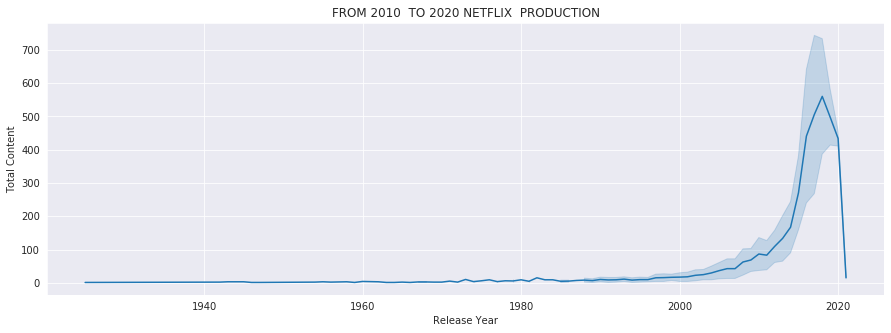

In [45]:
sns.set_style("darkgrid")
x=data2['Release Year']
y=data2['Total Content']
plt.figure(figsize=(15,5))
sns.lineplot(x,y,data=data1)
plt.title("FROM 2010  TO 2020 NETFLIX  PRODUCTION")

plt.show()

Entertaiment industy has been growing steady  from the year 2000 droppped sharply 2019 with a large even 
 
margin even before the infamous  covid19  the question what happen on november 2019 that trigged  such as drop

  In 2019 neflix stock dropped by 15% after the company  missed  subscriber expectations for Q2 and interest short by 20% their biggest problem  is paying more and more to acquire subscribers in marketing and streaming content raised  from $308 new subscribes in 2012 to $512  resulting to 50% high increment in expenditure with slow income
so neflix company it model was default even before covid19 hit


In [38]:
data4=data2[data2['Release Year']<=2010]
data4.head()

,Release Year,type,Total Content
0,1925,TV Show,1
1,1942,Movie,2
2,1943,Movie,3
3,1944,Movie,3
4,1945,Movie,3


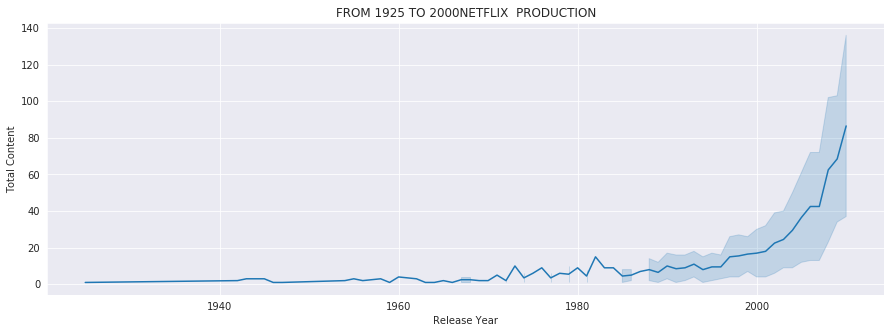

In [42]:
sns.set_style("darkgrid")
x=data4['Release Year']
y=data4['Total Content']
plt.figure(figsize=(15,5))
sns.lineplot(x,y,data=data1)
plt.title("FROM 1925 TO 2000NETFLIX  PRODUCTION")

plt.show()